In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.basemap import Basemap
import matplotlib

In [2]:
d_ahi = []
d_sgli = []
AHI_RAA = []
SGLI_RAA = []
AHI_SZA = []
SGLI_SZA = []
AHI_VZA = []
SGLI_VZA = []
site_name = 'ROI 6'
            
with open("/home/liwei/Himawari_SGLI/{}_2020_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n') 
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]] 
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])
            
with open("/home/liwei/Himawari_SGLI/{}_2021_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]]
            
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])    
            
            
            


In [64]:
SGLI_Cloud_Mask_05 = []
for date in d_sgli:
    with open('/media/liwei/Data/GCOM-C_RSRF_Valid/QA_flag/{}/QA_flag_{}_{}_05.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_Cloud_Mask_05.append(np.frombuffer(fp.read(),dtype=int).reshape(24,24))
SGLI_Cloud_Mask_05 = np.array(SGLI_Cloud_Mask_05)


In [30]:
'GC1SG1_20200714D01D_T0425_L2SG_RSRFQ_3001_QA_flag.tif'

'20210505'

In [183]:
import rioxarray as xr
geotiff_da = xr.open_rasterio('/media/liwei/Data/GCOM-C_RSRF_Valid/reporjection/GC1SG1_20200714D01D_T0425_L2SG_RSRFQ_3001_QA_flag.tif')

In [184]:
data = geotiff_da.values
error_mask = np.where(data != 65535, True ,False).reshape(2400, 7940)
data = data.reshape(2400, 7940)

In [134]:
a = np.bitwise_and(4497,data)

In [85]:
np.bitwise_and(4497,65535)

4497

In [67]:
a = np.bitwise_and(4497,SGLI_Cloud_Mask_05)

In [135]:
for day in range(20):
    for i in range(24):
        for j in range(24):
            if bin(SGLI_Cloud_Mask_05[0,i,j])[2:].zfill(16)[14] == '15':
                print(bin(SGLI_Cloud_Mask_05[0,i,j])[2:].zfill(16)[1])

In [200]:
cloud_mask = []
for i in range(2400):
    for j in range(7940):
#         if bin(SGLI_Cloud_Mask_05[0,i,j])[2:].zfill(16)[14] == '0':
        cloud_mask.append(int(bin(a[i,j])[2:].zfill(16)[15]))
#         print(bin(a[i,j])[2:].zfill(16)[15])
cloud_mask = np.array(cloud_mask).reshape(2400, 7940)
cloud_mask = np.where(a==4497,np.nan,cloud_mask)
# cloud_mask = np.where(cloud_mask>=0.5,1,0)
# cloud_mask = np.where(cloud_mask<0.5,0,cloud_mask)

In [197]:
np.nanmax(cloud_mask)

1.0

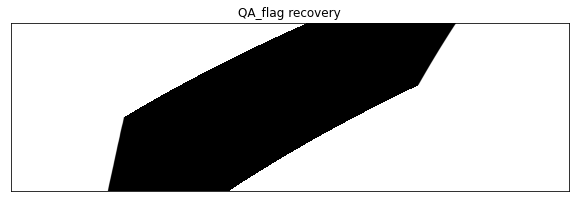

In [202]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))


axes.imshow(cloud_mask,cmap='gray')
axes.set_xticks([])
axes.set_yticks([])

plt.title('QA_flag recovery')
plt.show()

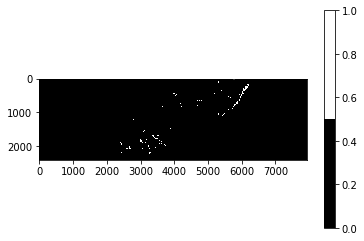

In [182]:
from matplotlib.colors import ListedColormap
name_label = ['clear','cloud'] 
C = np.array([[0,0,0],[1,1,1]])
cm = ListedColormap(C)
plt.imshow(cloud_mask,cmap=cm)
plt.colorbar()

In [17]:
bin(1928)[2:].zfill(16) == '0000011110001000'

True

In [ ]:
zfill(bin(1928)[2:])

In [765]:
mask1 = np.where(a == 0,True,False)

In [766]:
cloud_mask = np.array([(SGLI_Cloud_Mask_05)//(2**i)%2 for i in range(0,15)] + [SGLI_Cloud_Mask_05//(2**15)])

In [767]:
cloud_mask = cloud_mask[0,:,:,:]

In [191]:
import rioxarray as xr
geotiff_da = xr.open_rasterio('/media/liwei/Data/GCOM-C_RSRF_Valid/reporjection/GC1SG1_20200714D01D_T0425_L2SG_RSRFQ_3001_Rs_PI01.tif')
data = geotiff_da.values
# error_mask = np.where(data != 65535, True ,False).reshape(2400, 7940)
data = data.reshape(2400, 4971)
data = data * 0.0001

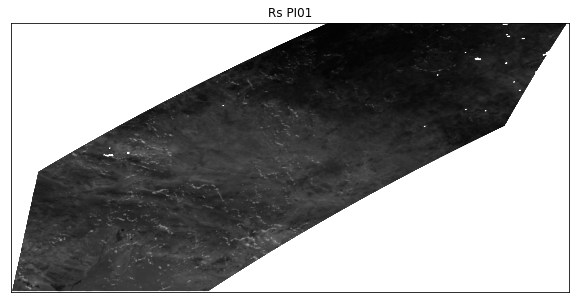

In [199]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))


axes.imshow(data,cmap='gray',vmax=1,vmin=0)
axes.set_xticks([])
axes.set_yticks([])
plt.title('Rs PI01')

plt.show()

In [768]:
cloud_mask = np.where(mask1 == True,cloud_mask,np.nan)

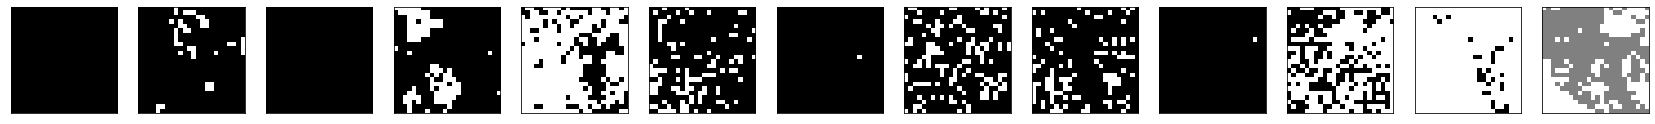

In [769]:
fig, axes = plt.subplots(1, 13, figsize=(26, 5))


for i,ax in enumerate (axes.flat):
#     ax.axis('off')
    im = ax.imshow(cloud_mask[i],cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(right=1) 
cb = fig.colorbar(im,ax=axes,cax=cax,extend='max')


plt.show()

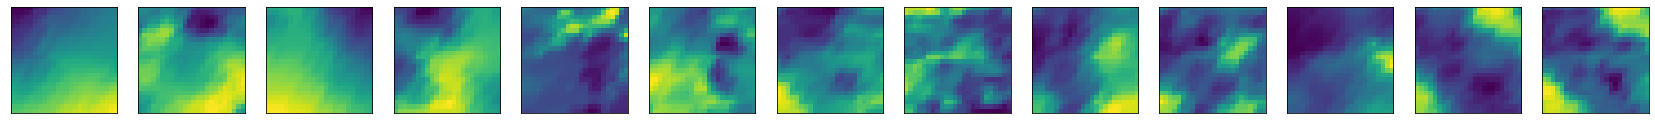

In [779]:
fig, axes = plt.subplots(1, 13, figsize=(26, 5))


for i,ax in enumerate (axes.flat):
#     ax.axis('off')
    im = ax.imshow(SGLI_PI01_rad[i])
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(right=1) 
cb = fig.colorbar(im,ax=axes,cax=cax,extend='max')


plt.show()

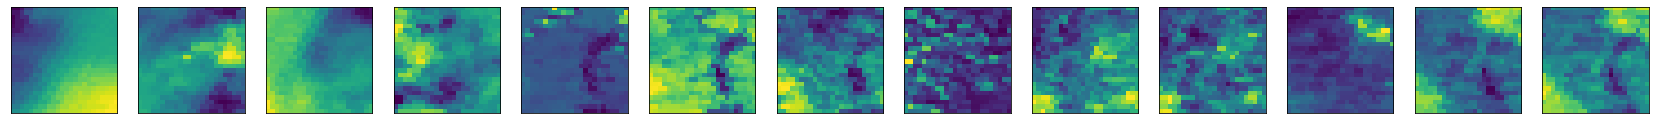

In [780]:
fig, axes = plt.subplots(1, 13, figsize=(26, 5))


for i,ax in enumerate (axes.flat):
#     ax.axis('off')
    im = ax.imshow(AHI_data_b03_rad[i],cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(right=1) 
cb = fig.colorbar(im,ax=axes,cax=cax,extend='max')


plt.show()

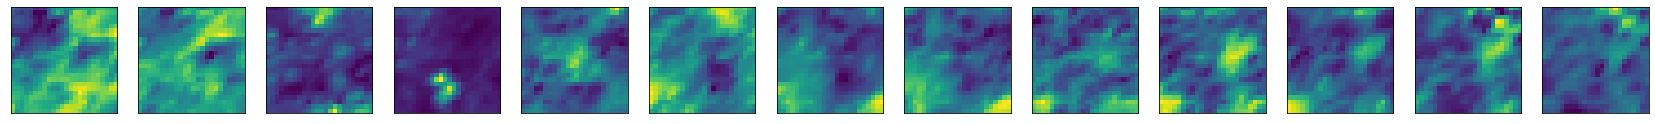

In [777]:
fig, axes = plt.subplots(1, 13, figsize=(26, 5))


for i,ax in enumerate (axes.flat):
#     ax.axis('off')
    im = ax.imshow(SGLI_PI01[i])
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(right=1) 
cb = fig.colorbar(im,ax=axes,cax=cax,extend='max')


plt.show()

In [745]:
test_PI01 = np.where(np.isnan(cloud_mask),SGLI_PI01,np.nan)

In [527]:
j[:,0,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [729]:
'{:016b}'.format(2)

'0000000000000010'

In [523]:
j[-1,:,:,:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [511]:
bin(256)

'0b100000000'

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

In [275]:
from skimage.measure import block_reduce

AHI_B03_10 = block_reduce(np.array(AHI_data_b03), block_size=(1,2,2), func=np.nanmean)

In [55]:
b04 = AHI_data_b04[~np.isnan(AHI_data_b04)]
PI02 = SGLI_PI02[~np.isnan(SGLI_PI02)]

In [88]:
b03 = AHI_data_b03[~np.isnan(AHI_data_b03)]
PI01 = SGLI_PI01[~np.isnan(SGLI_PI01)]

In [92]:
p = np.polyfit(b03, PI01*1.175,1)
k = np.around(p[0],5)
b = np.around(p[1],5)
xx = np.arange(0,0.6,0.1) 
yy = k * xx + b

In [337]:
AHI_data_b04 = np.where(np.array(AHI_B03_10) > 0.15,np.nan,np.array(AHI_data_b04))
SGLI_PI02 = np.where(np.array(AHI_B03_10) > 0.15,np.nan,np.array(SGLI_PI02))

In [338]:
SGLI_PI02 = np.where(np.array(AHI_data_b04) > 0.3,np.nan,np.array(SGLI_PI02))
AHI_data_b04 = np.where(np.array(AHI_data_b04) > 0.3,np.nan,np.array(AHI_data_b04))

In [859]:
s = []
a = []
l =[6,8,9]
for i in range (3):
    s.append(SGLI_PI01[l[i]])
    a.append(AHI_data_b03[l[i]])

In [847]:
from sklearn.metrics import mean_squared_error, r2_score

In [860]:
r2_score(np.array(s).reshape(-1),np.array(a).reshape(-1))

0.12608372186631067

In [861]:
np.polyfit(np.array(s).reshape(-1),np.array(a).reshape(-1),1)

array([0.75887838, 0.01836155])

In [261]:
sza = abs(np.array(AHI_SZA).astype(float) - np.array(SGLI_SZA).astype(float))
vza = abs(np.array(AHI_VZA).astype(float) - np.array(SGLI_VZA).astype(float))
raa = abs(np.array(AHI_RAA).astype(float) - np.array(SGLI_RAA).astype(float))

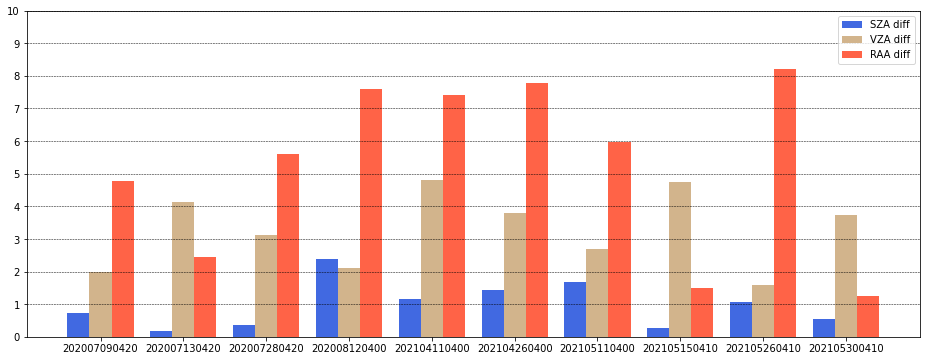

In [280]:
fig = plt.figure(figsize=(16,6))

size = a.size
x = np.arange(size)
total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='SZA diff',color = 'royalblue')
plt.bar(x + width, b, width=width, label='VZA diff',color = 'tan')
plt.bar(x + 2 * width, c, width=width, label='RAA diff',color = 'tomato')
plt.xticks(range(0,size),d_ahi)
plt.yticks(np.arange(0,11,1))
plt.ylim((0, 10))

# plt.title("ROI 4 SZA/VZA/RAA",fontsize='xx-large')
plt.grid(axis = 'y',color = 'k', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'best')
plt.show()

In [16]:
# Radiance
AHI_data_b04_rad = []
AHI_data_b03_rad = []
for date in d_ahi:
    with open('/media/liwei/Data/AHI_AC_RESULT_Validation/{}_AC/{}_{}_b04_rad.dat'.format(date,date,site_name),'rb') as fp:
        AHI_data_b04_rad.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))
    with open('/media/liwei/Data/AHI_AC_RESULT_Validation/{}_AC/{}_{}_b03_rad.dat'.format(date,date,site_name),'rb') as fp:
        AHI_data_b03_rad.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))

SGLI_PI01_rad = []
SGLI_PI02_rad = []
for date in d_sgli:
    with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Lt_PI01/{}/Lt_PI01_{}_{}_rad.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI01_rad.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Lt_PI02/{}/Lt_PI02_{}_{}_rad.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI02_rad.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))

In [68]:
d_ahi = []
d_sgli = []
AHI_RAA = []
SGLI_RAA = []
AHI_SZA = []
SGLI_SZA = []
AHI_VZA = []
SGLI_VZA = []
site_name = 'ROI 6'
            
with open("/home/liwei/Himawari_SGLI/{}_2020_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n') 
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]] 
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])
            
with open("/home/liwei/Himawari_SGLI/{}_2021_PL.txt".format(site_name), "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        if line[0:8] == 'AHI TIME':
            ahi = [line[9:13],line[14:16],line[17:19],line[20:22],line[23:25]]
            
            d_ahi.append("".join(ahi))
        elif line[0:9] == 'SGLI TIME':
            sgli = [line[10:14],line[15:17],line[18:20]]
            
            d_sgli.append("".join(sgli))
        elif line[0:5] == 'AHI_R':
            AHI_RAA.append(line.split(' ')[0][8:])
            SGLI_RAA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_V':
            AHI_VZA.append(line.split(' ')[0][8:])
            SGLI_VZA.append(line.split(' ')[1][9:])
        elif line[0:5] == 'AHI_S':
            AHI_SZA.append(line.split(' ')[0][8:])
            SGLI_SZA.append(line.split(' ')[1][9:])    
            
            
            


#TOA Ref
AHI_data_b04_toa = []
AHI_data_b03_toa = []
for date in d_ahi:
    with open('/media/liwei/Data/AHI_AC_RESULT_Validation/{}_AC/{}_{}_b04_toa.dat'.format(date,date,site_name),'rb') as fp:
        AHI_data_b04_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))
    with open('/media/liwei/Data/AHI_AC_RESULT_Validation/{}_AC/{}_{}_b03_toa.dat'.format(date,date,site_name),'rb') as fp:
        AHI_data_b03_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))

SGLI_PI01_toa = []
SGLI_PI02_toa = []
for date in d_sgli:
    with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Lt_PI01/{}/Lt_PI01_{}_{}_toa.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI01_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(24,24))
    with open('/media/liwei/Data/GCOM-C_RSRF_Valid/Lt_PI02/{}/Lt_PI02_{}_{}_toa.dat'.format(date,date,site_name),'rb') as fp:
        SGLI_PI02_toa.append(np.frombuffer(fp.read(),dtype='f4').reshape(12,12))

In [615]:
AHI_data_b04_rad = np.array(AHI_data_b04_rad)
AHI_data_b03_rad = np.array(AHI_data_b03_rad)
SGLI_PI01_rad = np.array(SGLI_PI01_rad)
SGLI_PI02_rad = np.array(SGLI_PI02_rad)

In [622]:
def identifer(a):
    mean = np.nanmean(a)
    std = np.nanstd(a) 
    down = mean - 3 * std
    up =  mean + 3 * std
    n_a = np.where(a < down,np.nan,a)
    n_a = np.where(n_a > up,np.nan,n_a)
    return n_a

In [619]:
N_AHI_data_b04 = identifer(AHI_data_b04_rad)
N_SGLI_PI02 = identifer(SGLI_PI02_rad)
N_AHI_data_b03 = identifer(AHI_data_b03_rad)
N_SGLI_PI01 = identifer(SGLI_PI01_rad)

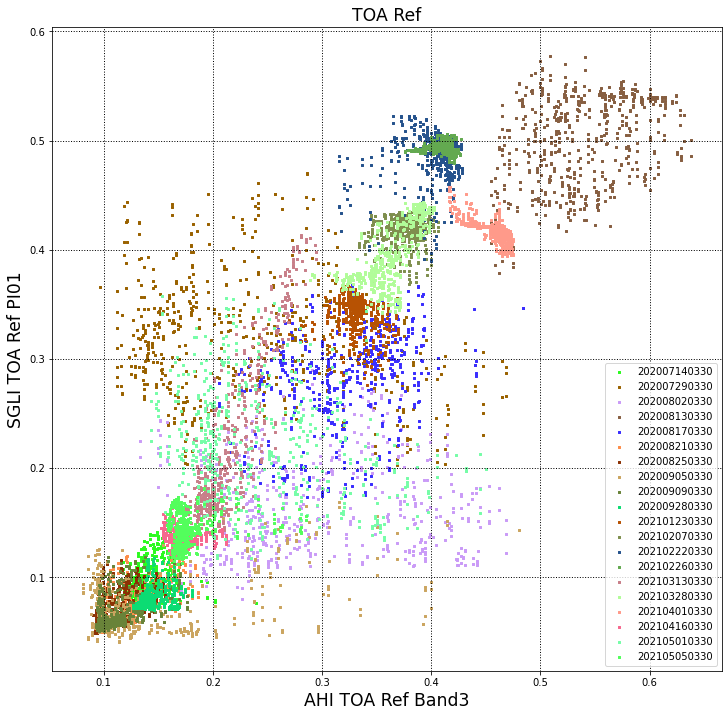

In [69]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:120]
c = []
for (i,j) in color100:
    c.append(j)
    
for i in range(len(AHI_data_b03_toa)):
    ax.scatter(AHI_data_b03_toa[i]/100, SGLI_PI01_toa[i],marker='s',s=5,c=c[i],label=d_ahi[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(10,160,20))
# ax.set_yticks(np.arange(10,160,20))
ax.set_xlabel("AHI TOA Ref Band3",fontsize='xx-large')
ax.set_ylabel("SGLI TOA Ref PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(10,400)
# plt.ylim(10,400)
plt.title('TOA Ref',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

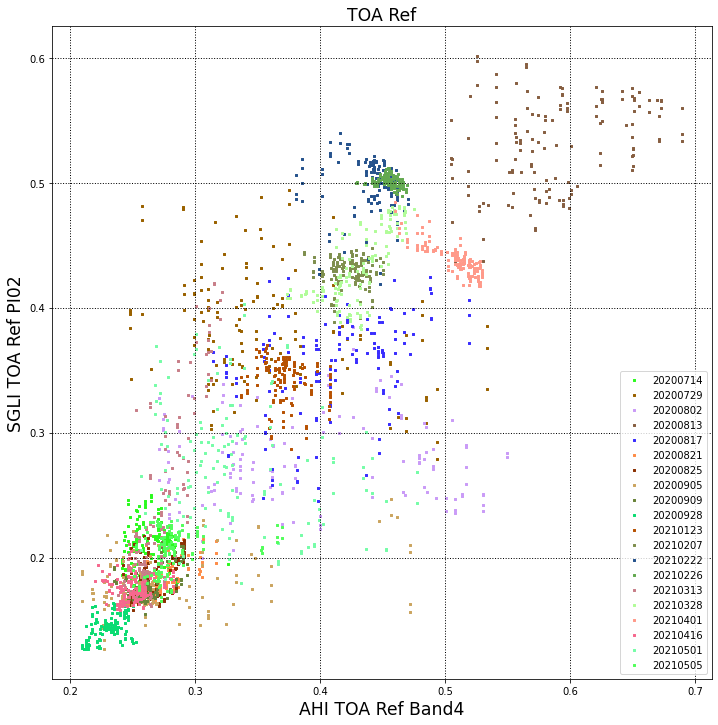

In [70]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')


color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:120]
c = []
for (i,j) in color100:
    c.append(j)

for i in range(len(AHI_data_b04_toa)):
    ax.scatter(AHI_data_b04_toa[i]/100, SGLI_PI02_toa[i],marker='s',s=5,c=c[i],label=d_sgli[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(0,0.6,0.1))
# ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_xlabel("AHI TOA Ref Band4",fontsize='xx-large')
ax.set_ylabel("SGLI TOA Ref PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(40,200)
# plt.ylim(40,200)
plt.title('TOA Ref',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band4.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

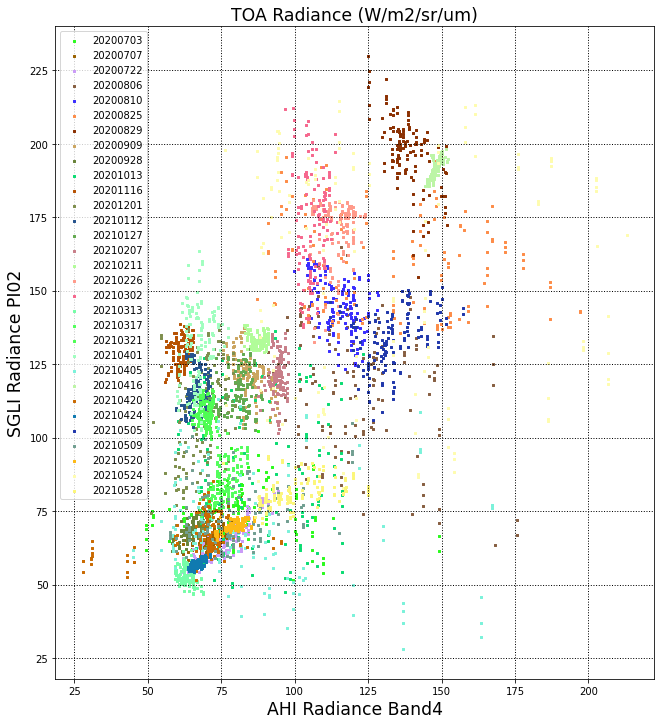

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')


color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:150]
c = []
for (i,j) in color100:
    c.append(j)

for i in range(len(AHI_data_b04_rad)):
    ax.scatter(AHI_data_b04_rad[i], SGLI_PI02_rad[i],marker='s',s=5,c=c[i],label=d_sgli[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(0,0.6,0.1))
# ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_xlabel("AHI Radiance Band4",fontsize='xx-large')
ax.set_ylabel("SGLI Radiance PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(40,200)
# plt.ylim(40,200)
plt.title('TOA Radiance (W/m2/sr/um)',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band4.jpg'.format(site),dpi = 1000,bbox_inches = 'tight')

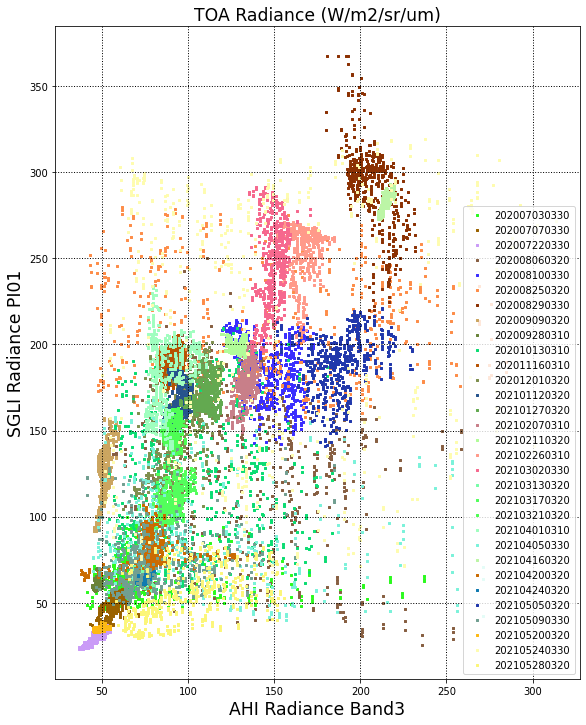

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:150]
c = []
for (i,j) in color100:
    c.append(j)
    
for i in range(len(AHI_data_b03_rad)):
    ax.scatter(AHI_data_b03_rad[i], SGLI_PI01_rad[i],marker='s',s=5,c=c[i],label=d_ahi[i])
    
# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04, SGLI_PI02*0.989,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(10,160,20))
# ax.set_yticks(np.arange(10,160,20))
ax.set_xlabel("AHI Radiance Band3",fontsize='xx-large')
ax.set_ylabel("SGLI Radiance PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.set_aspect(1)
# plt.xlim(10,400)
# plt.ylim(10,400)
plt.title('TOA Radiance (W/m2/sr/um)',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')

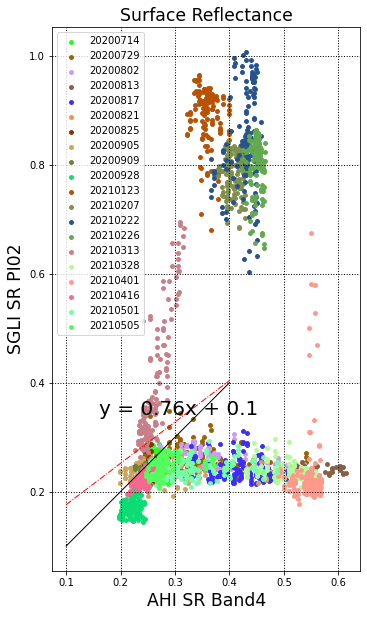

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')

color100 = list(matplotlib.colors.XKCD_COLORS.items())[90:150]
c = []
for (i,j) in color100:
    c.append(j)

SGLI_PI02_1 = np.array(SGLI_PI02).flatten()
AHI_data_b04_1 = np.array(AHI_data_b04).flatten()
nan_mask = np.where(np.isnan(SGLI_PI02_1),False,True)
SGLI_PI02_1 = SGLI_PI02_1[nan_mask]
AHI_data_b04_1 = AHI_data_b04_1[nan_mask]

# r2 = r2_score(np.array(AHI_data_b04).reshape(-1)*0.991, np.array(SGLI_PI02).reshape(-1))
p = np.polyfit(AHI_data_b04_1*0.991, SGLI_PI02_1,1)    

k = round(p[0],2)
b = round(p[1],2)

xx = np.arange(0.1,0.4,0.05) 
yy = k * xx + b

x = np.arange(0.1,0.4,0.05) 
y = 1 * x
      
for i in range(len(AHI_data_b04)):
    ax.scatter(AHI_data_b04[i]*0.991, SGLI_PI02[i],marker='o',c=c[i],s=15,label=d_sgli[i])
#     ax.scatter(AHI_data_b04_toa[i]/100*0.991, SGLI_PI02_toa[i],marker='1',s=15,c='gray',alpha=0.5)

# plt.plot(xx,yy,color='gold',linewidth=2,linestyle='-')
# ax.scatter(AHI_data_b04*0.93, SGLI_PI02,marker='s',s=9,c='k')    

# ax.set_xticks(np.arange(0,0.6,0.1))
# ax.set_yticks(np.arange(0,0.6,0.1))
ax.set_xlabel("AHI SR Band4",fontsize='xx-large')
ax.set_ylabel("SGLI SR PI02",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')

ax.text(0.16,0.34,s = 'y = {}x + {}'.format(k,b),fontsize=20)
# ax.text(0.16,0.32,s = 'R2:{}'.format(r2),fontsize=15)

ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 
ax.set_aspect(1)
# plt.xlim(0.1,0.35)
# plt.ylim(0.1,0.35)
plt.title('Surface Reflectance',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band4.jpg'.format(site),dpi = 1000,bbox_inches = 'tight')

TypeError: expected non-empty vector for x

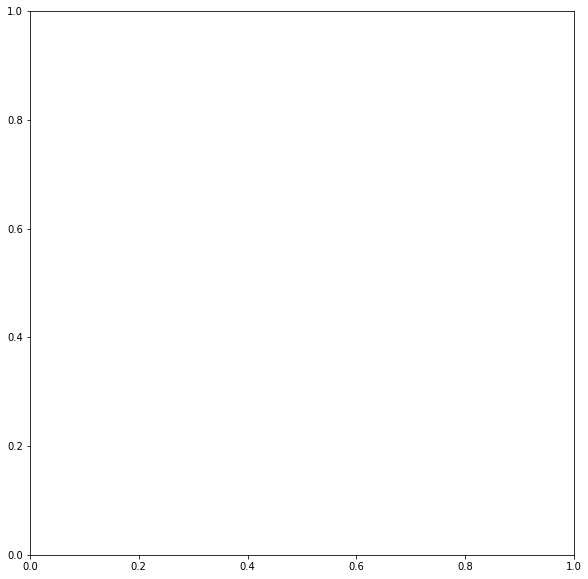

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,aspect='equal')



color100 = list(matplotlib.colors.XKCD_COLORS.items())[220:250]
c = []
for (i,j) in color100:
    c.append(j)

    
    
    
SGLI_PI01_1 = np.array(SGLI_PI01).flatten()
AHI_data_b03_1 = np.array(AHI_data_b03).flatten()
nan_mask = np.where(np.isnan(SGLI_PI01_1),False,True)
SGLI_PI01_1 = SGLI_PI01_1[nan_mask]
AHI_data_b03_1 = AHI_data_b03_1[nan_mask]

# r2 = r2_score(np.array(AHI_data_b04).reshape(-1)*0.991, np.array(SGLI_PI02).reshape(-1))
p = np.polyfit(AHI_data_b03_1*1.033,SGLI_PI01_1,1)    

k = round(p[0],2)
b = round(p[1],2)

xx = np.arange(0.1,0.4,0.05) 
yy = k * xx + b

x = np.arange(0.1,0.4,0.05) 
y = 1 * x


for i in range(len(AHI_data_b03)):
    ax.scatter(AHI_data_b03[i], SGLI_PI01[i],marker='o', c=c[i],s=15,label=d_ahi[i])
#     ax.scatter(AHI_data_b03_toa[i]/100*0.991, SGLI_PI01_toa[i],marker='1',s=15,c='gray',alpha=0.5)

    # i=9
# ax.scatter(AHI_data_b03[i], SGLI_PI01[i],marker='s',s=5,c=c[i],label=d_ahi[i])

ax.plot(x,y,color='k',linewidth=1,linestyle='-') 
ax.plot(xx,yy,color='r',linewidth=1,linestyle='-.') 

ax.set_xlabel("AHI SR Band3",fontsize='xx-large')
ax.set_ylabel("SGLI SR PI01",fontsize='xx-large')
ax.grid(color='k', linestyle='dotted', linewidth=1,which='both')
ax.text(0.16,0.28,s = 'y = {}x + {}'.format(k,b),fontsize=20)

ax.set_aspect(1)
plt.xlim(0.1,0.3)
plt.ylim(0.1,0.3)
plt.title('Surface Reflectance',fontsize='xx-large')
plt.legend()
plt.show()
# fig.savefig('{} Band3.jpg'.format(site_name),dpi = 1000,bbox_inches = 'tight')